# Tuorial 5, Question 1

In [1]:
import torch
from torch import nn

import numpy as np
import matplotlib.pyplot as plt

In [2]:
no_labels = 1
no_features = 2
no_exps = 10

lr = 0.05
no_epochs = 5000
patience = 10

hidden_units = [2, 4, 6, 8, 10]

In [3]:
seed = 10
torch.manual_seed(seed)
np.random.seed(seed)

In [4]:
class MLP(nn.Module):
    def __init__(self, no_features, no_hidden, no_labels):
        super().__init__()
        self.mlp_stack = nn.Sequential(
            nn.Linear(no_features, no_hidden),
            nn.Sigmoid(),
            nn.Linear(no_hidden, no_labels),
        )

    def forward(self, x):
        logits = self.mlp_stack(x)
        return logits

In [5]:
class EarlyStopper:
    def __init__(self, patience=10, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [6]:
def train_exp(X, Y):

    x_train, y_train, x_test, y_test = X[:70], Y[:70], X[70:], Y[70:]
    
    loss_ = []
    for no_hidden in hidden_units:
        
        model = MLP(no_features, no_hidden, no_labels)
    
        loss_fn = torch.nn.MSELoss()
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
        early_stopper = EarlyStopper(patience=patience, min_delta=0)
        
        for epoch in range(no_epochs):
            pred = model(torch.tensor(x_train, dtype=torch.float))
            train_loss = loss_fn(pred, torch.tensor(y_train, dtype=torch.float))
    
            # Backpropagation
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
        
            pred = model(torch.tensor(x_test, dtype=torch.float))
            test_loss = loss_fn(pred, torch.tensor(y_test, dtype=torch.float))
            
            if early_stopper.early_stop(test_loss): 
                break
        
        loss_.append(test_loss.item())
        
    return loss_

In [7]:
# generate training data
X = np.zeros((10*10, 2))
no_data = 0
for i in np.arange(-1.0, 1.001, 2.0/9.0):
    for j in np.arange(-1.0, 1.001, 2.0/9.0):
        X[no_data] = [i, j]
        no_data += 1
Y = np.zeros((no_data, 1))
Y[:,0] = np.sin(np.pi*X[:,0])*np.cos(2*np.pi*X[:,1])

In [8]:
idx = np.arange(no_data)

# perform experiments
err = []
print('hidden units: {}'.format(hidden_units))
for exp in range(no_exps):
 
    np.random.shuffle(idx)
    err.append(train_exp(X[idx], Y[idx]))
    print('exp: {}, errors: {}'.format(exp, np.array(err[exp])))

hidden units: [2, 4, 6, 8, 10]
exp: 0, errors: [0.31180769 0.31221333 0.30825767 0.30583131 0.32371908]
exp: 1, errors: [0.18281141 0.18256514 0.18550874 0.18528558 0.17370273]
exp: 2, errors: [0.24535613 0.23845761 0.2406922  0.2469285  0.24165829]
exp: 3, errors: [0.22513752 0.21813853 0.22147274 0.21525638 0.21561466]
exp: 4, errors: [0.24940346 0.24727154 0.24623972 0.25435033 0.25516379]
exp: 5, errors: [0.25583172 0.25079072 0.24044172 0.24900703 0.2754139 ]
exp: 6, errors: [0.22024319 0.2223404  0.22123598 0.22461759 0.23194946]
exp: 7, errors: [0.21609326 0.2305754  0.23943792 0.24411394 0.23677668]
exp: 8, errors: [0.23604523 0.23236626 0.23800306 0.25308883 0.24641295]
exp: 9, errors: [0.24079554 0.24114349 0.2532728  0.23831908 0.25188628]


In [9]:
# print the mean errors of different models
mean_err = np.mean(np.array(err), axis = 0)
print('mean errors: {}'.format(mean_err))
print(' *hidden units* %d '%hidden_units[np.argmin(mean_err)])

mean errors: [0.23835251 0.23758624 0.23945626 0.24167986 0.24522978]
 *hidden units* 4 


Text(0, 0.5, 'mean error')

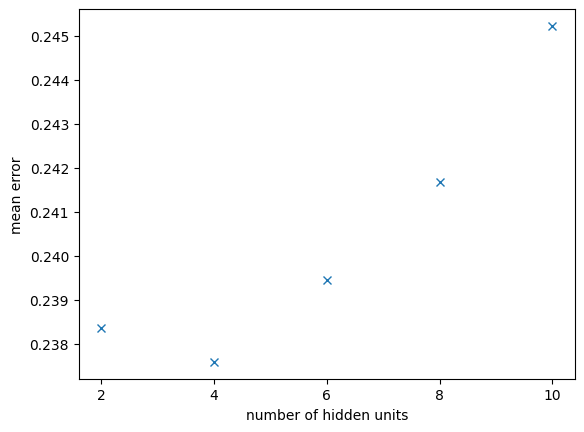

In [10]:
plt.figure(1)
plt.plot(hidden_units, mean_err, marker = 'x', linestyle = 'None')
plt.xticks(hidden_units)
plt.xlabel('number of hidden units')
plt.ylabel('mean error')